In [1]:
# ignore this
%load_ext music21.ipython21

User’s Guide, Chapter 22: Graphing
==================================

Music notation isn't the only way to understand music visually.  Sometimes a plot of a musical score can reveal relationships across a piece that are hard to understand otherwise. `music21` includes a lot of ways to visualize notes, scores, and measures, and in this chapter we will see some of the most common ones.

## Piano Rolls!

The easiest way to see how pitches evolve over the course of a piece is to create a virtual representation
of a piano roll.  Unlike a traditional piano roll, time is usually represented on the horizontal axis and
pitch height along the vertical.  The easiest way to see how this works is simply to create one of these
graphs, so we can get started.  Let's load up some Verdi:

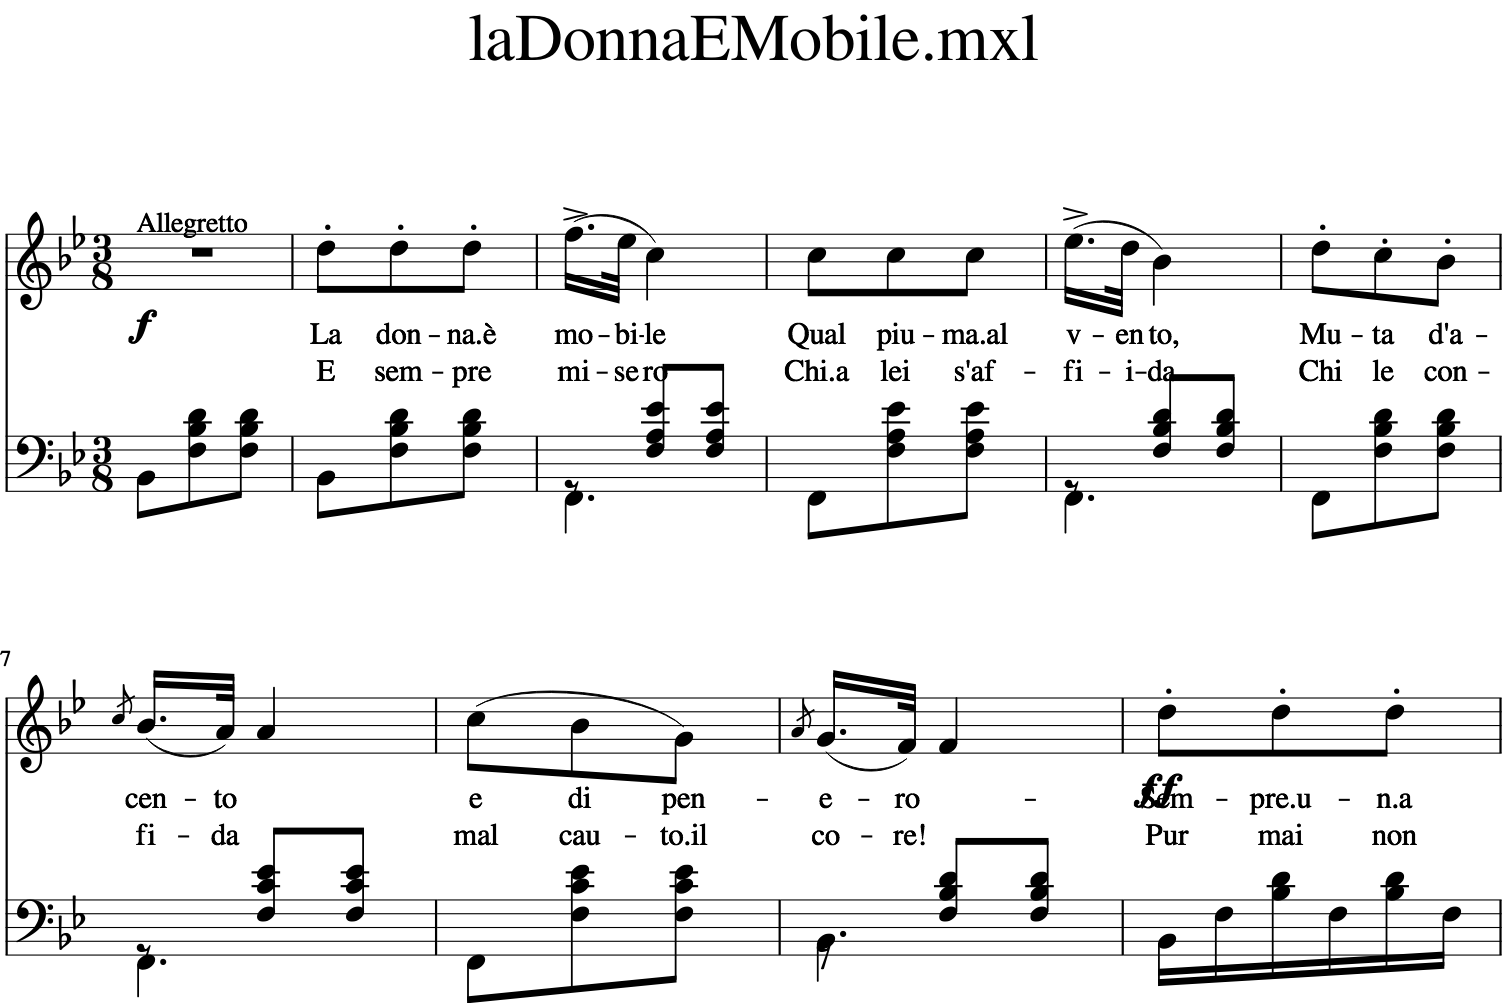

In [2]:
verdi = corpus.parse('verdi/laDonnaEMobile')
verdi.measures(1, 10).show()

First, let's visualize the vocal part alone:

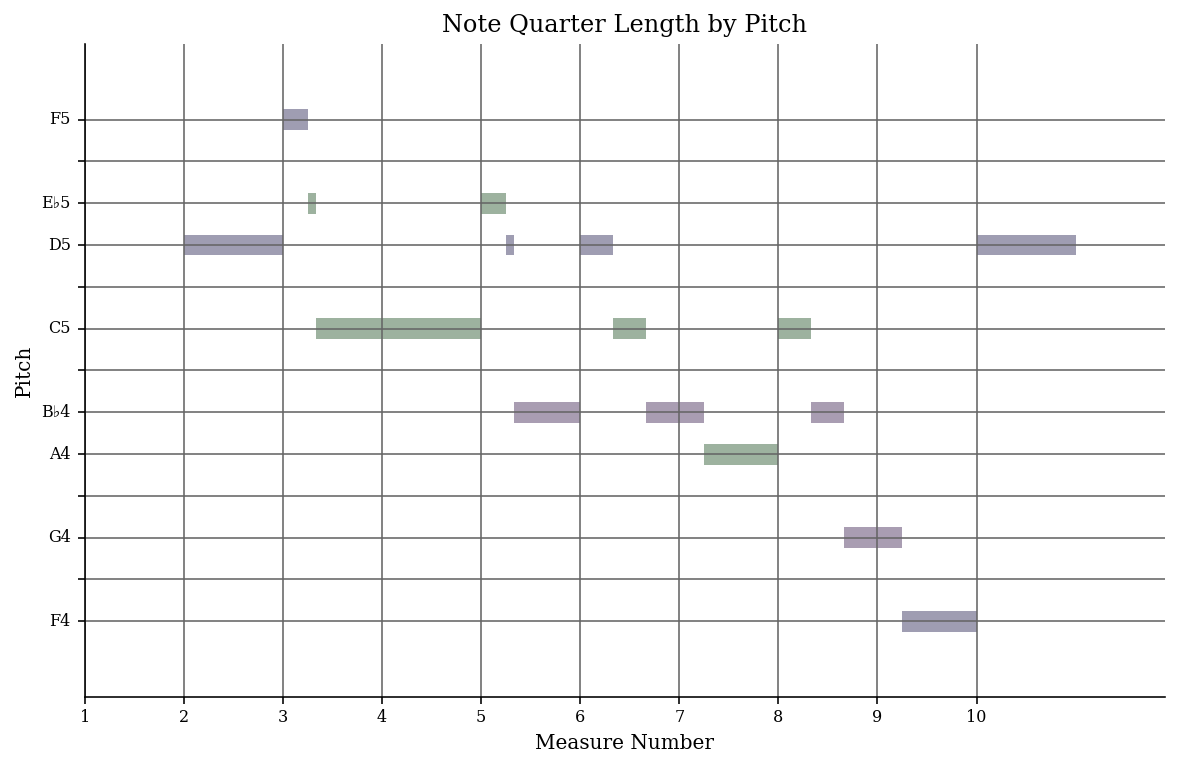

In [3]:
voice = verdi.parts[0]
voice.measures(1, 10).plot()

The default here is to plot pitch against time, calculated in measures.  `music21` takes care of some of the hard things that can make visualizing music in most data visualization software (such as Microsoft Excel) difficult.  For instance, measure numbers are used directly as they appear in the score; pitches are labeled with names only when they appear (including the choosing most commonly appearing enharmonic spelling, using proper sharp and flat signs instead of "b" and "#").  We can make a fake piece to see how this works:

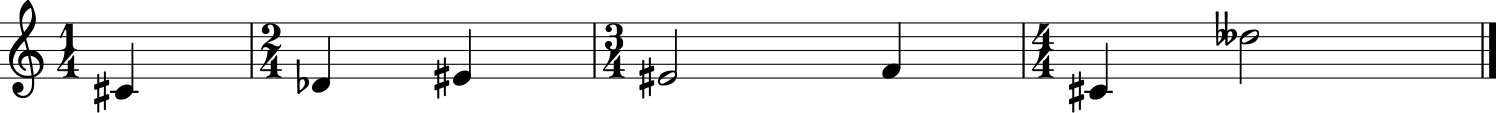

In [4]:
fakePiece = converter.parse("tinyNotation: 1/4 c#4 2/4 d-4 e#4 3/4 e#2 f4 4/4 c#4 d'--2")
fakePiece.show()

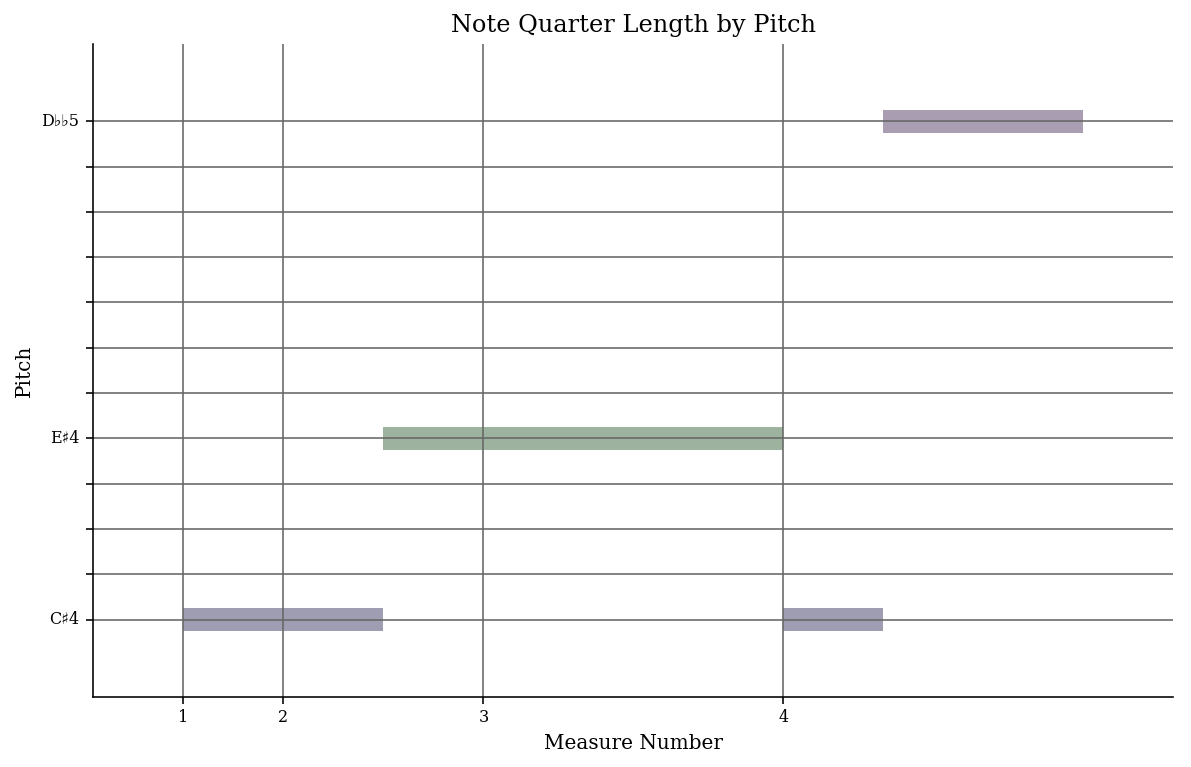

In [5]:
fakePiece.plot()

(This was hard to do! And we're, I hope justifiably, proud of getting things like this right.  Major shoutout to Christopher Ariza who wrote 90% of the graphing code).

## Installing graphing software

All plots require installing the `matplotlib` and `numpy` libraries.   On `python3` install them by typing at the command line:

    pip3 install matplotlib
    
and `numpy` will come along free.  Depending on your Python installation you might need to instead type:

    sudo pip3 install matplotlib
    
In recent versions of OS X/macOS, such as El Capitan and Sierra, there are some major problems in installing `matplotlib` on some Python installations (including `Anaconda` python).  This is why `music21` recommends using the Python 3 installation directly from [the Python.org website](http://www.python.org).  To use matplotlib inside a Jupyter notebook, add

    %matplotlib inline
    
to the first notebook cell.  However this step is not necessary if the music21 extension is installed with:

    %load_ext music21.ipython21

For more information on installing, see :ref:`installAdditional`

## Making other graphs

Calling :meth:`~music21.stream.Stream.plot` on a `Stream` is a shortcut way of calling :func:`music21.graph.plotStream` with the Stream as the first argument, so you will find most of the documentation on how to work with these plots there.


While the :meth:`~music21.base.Music21Object.show` method provides common
musical views of a Stream, a visual plot a Stream's elements is very 
useful. Sometimes called a piano roll, we might graph the pitch of a 
Note over its position in a Measure (or offset if no Measures are 
defined). The :meth:`~music21.stream.Stream.plot` method permits us to 
create a plot of any Stream or Stream subclass (note that the additional
package matplotlib needs to be installed to run graphs, see :ref:`installAdditional`
for more information). There are a large variety 
of plots: see :ref:`moduleGraph` for a complete list. There are a number 
of ways to get the desired plot; one, as demonstrated below, is to provide 
the name of the plot as a string. We can also add a keyword argument for 
the title of the plot (and configure many other features).

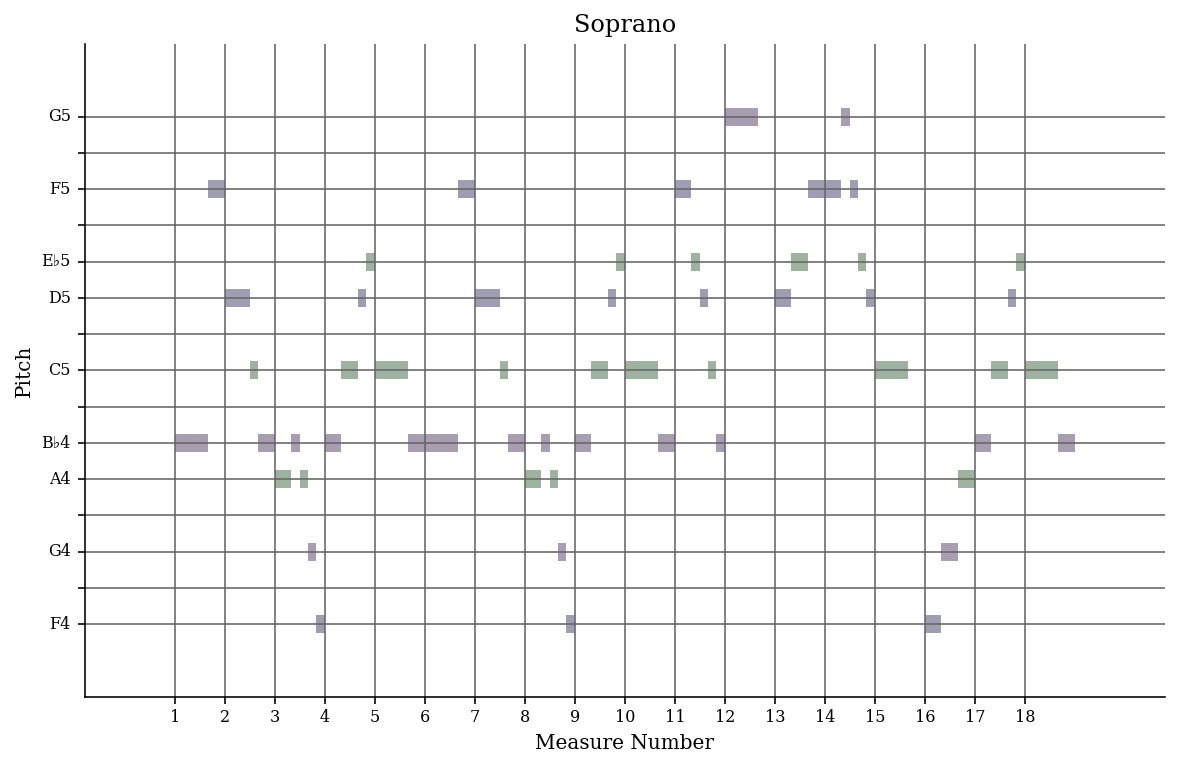

In [6]:
from music21 import *
sBach = corpus.parse('bach/bwv57.8')
sBach.getElementById('Soprano').plot('PlotHorizontalBarPitchSpaceOffset', title='Soprano')

Just getting started here... hang tight. :-)